In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


## Visualization 1: Global AI Tool Adoption Heatmap by Country & Year

This choropleth map visualizes the average AI tool adoption rate for each country for the year 2024. The color of each country represents its adoption rate, allowing for a quick comparison of AI integration across different regions.

In [19]:
import pandas as pd
import plotly.express as px

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Filter data for the year 2024 and calculate average adoption rate per country
map_data = df[df['year'] == 2024].groupby('country')['adoption_rate'].mean().reset_index()

# Create the choropleth map
fig = px.choropleth(map_data,
                    locations="country",
                    locationmode='country names',
                    color="adoption_rate",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global AI Tool Adoption Rate by Country (2024)",
                    height=700)

fig.show()

In [18]:

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Filter data for the year 2024 and calculate average adoption rate per country
map_data = df[df['year'] == 2023].groupby('country')['adoption_rate'].mean().reset_index()

# Create the choropleth map
fig = px.choropleth(map_data,
                    locations="country",
                    locationmode='country names',
                    color="adoption_rate",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global AI Tool Adoption Rate by Country (2023)",
                    height=700)

fig.show()

## Visualization 2

This grouped bar chart illustrates the average adoption rate of various AI tools within each industry. This view helps compare how different tools perform across sectors and highlights which industries are leading in AI adoption.

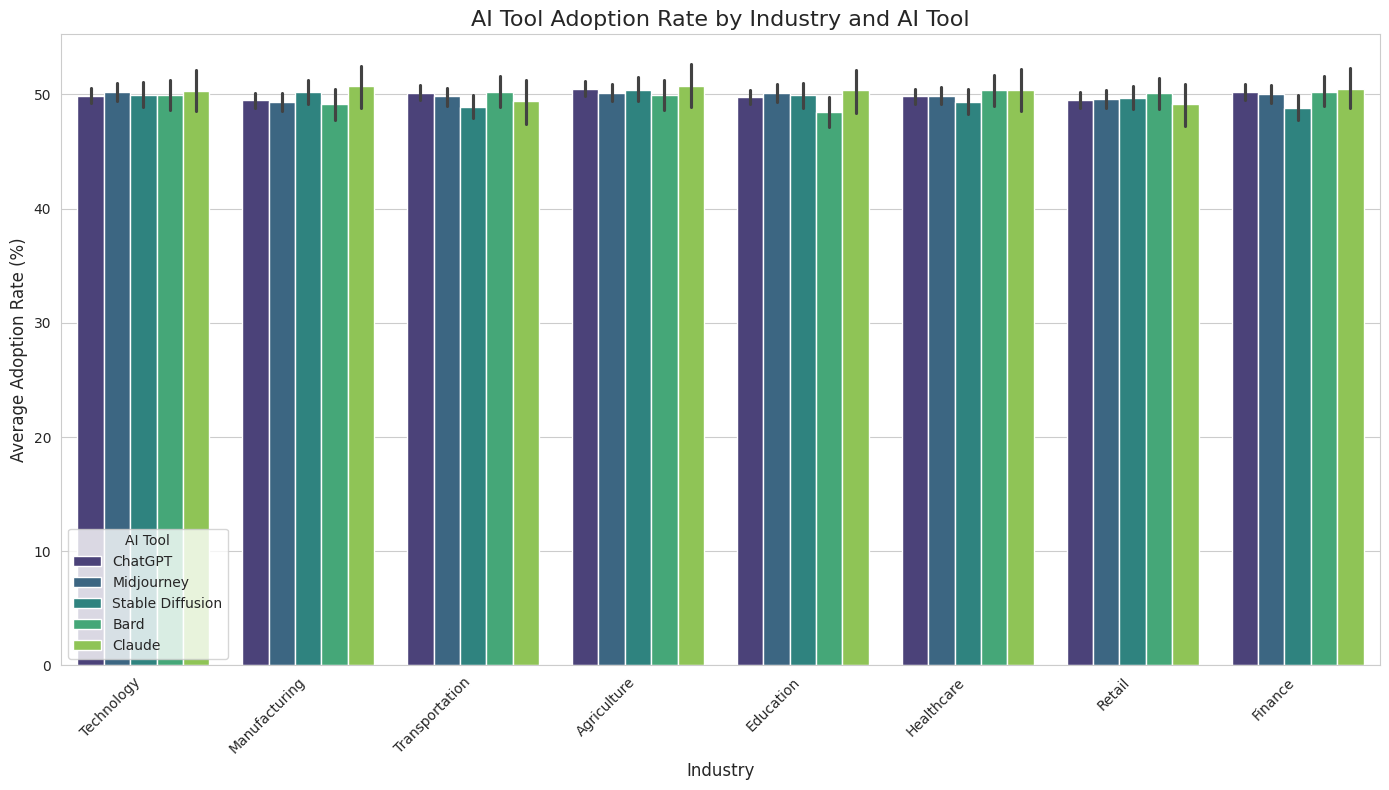

In [ ]:
# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Set plot style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(data=df, x='industry', y='adoption_rate', hue='ai_tool', palette='viridis')

# Set plot titles and labels
plt.title('AI Tool Adoption Rate by Industry and AI Tool', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Adoption Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Tool')
plt.tight_layout()
plt.show()

## Visualization 3: AI Tool Adoption Rate by Age Group

This simple bar chart shows the average adoption rate across different age groups. It effectively highlights which demographics are most actively adopting AI tools.

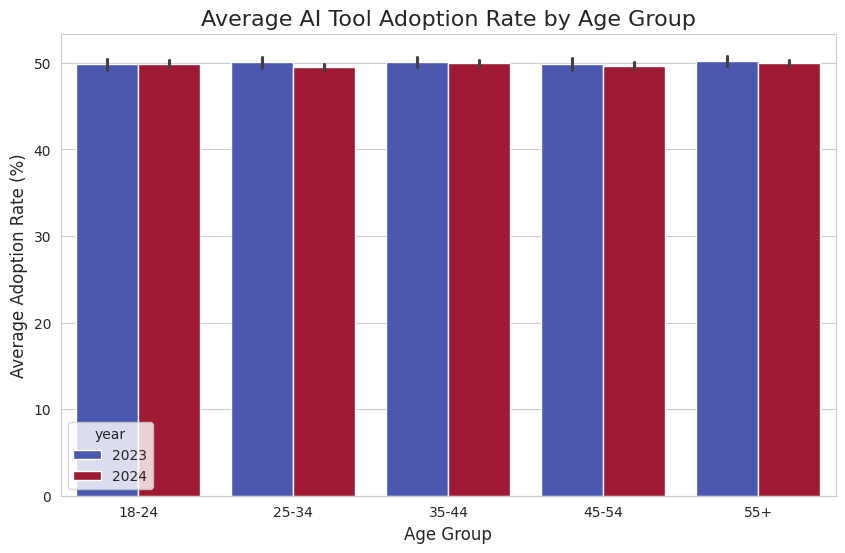

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Set plot style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define a logical order for the age groups
age_order = sorted(df['age_group'].unique())

# Create the bar chart
sns.barplot(data=df, x='age_group', y='adoption_rate', hue='year', estimator='mean', order=age_order, palette='coolwarm')

# Set plot titles and labels
plt.title('Average AI Tool Adoption Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Adoption Rate (%)', fontsize=12)
plt.show()

In [30]:
df.groupby('age_group')['adoption_rate'].mean().reset_index()

,age_group,adoption_rate
0,18-24,49.882366
1,25-34,49.701375
2,35-44,50.011082
3,45-54,49.724004
4,55+,50.043967


## Visualization 4: AI Tool Adoption Rate by Age Group Grouped by Country

This grouped bar chart displays the average adoption rate by age, further segmented by country. The visualization reveals geographical differences in how various age groups adopt AI technology

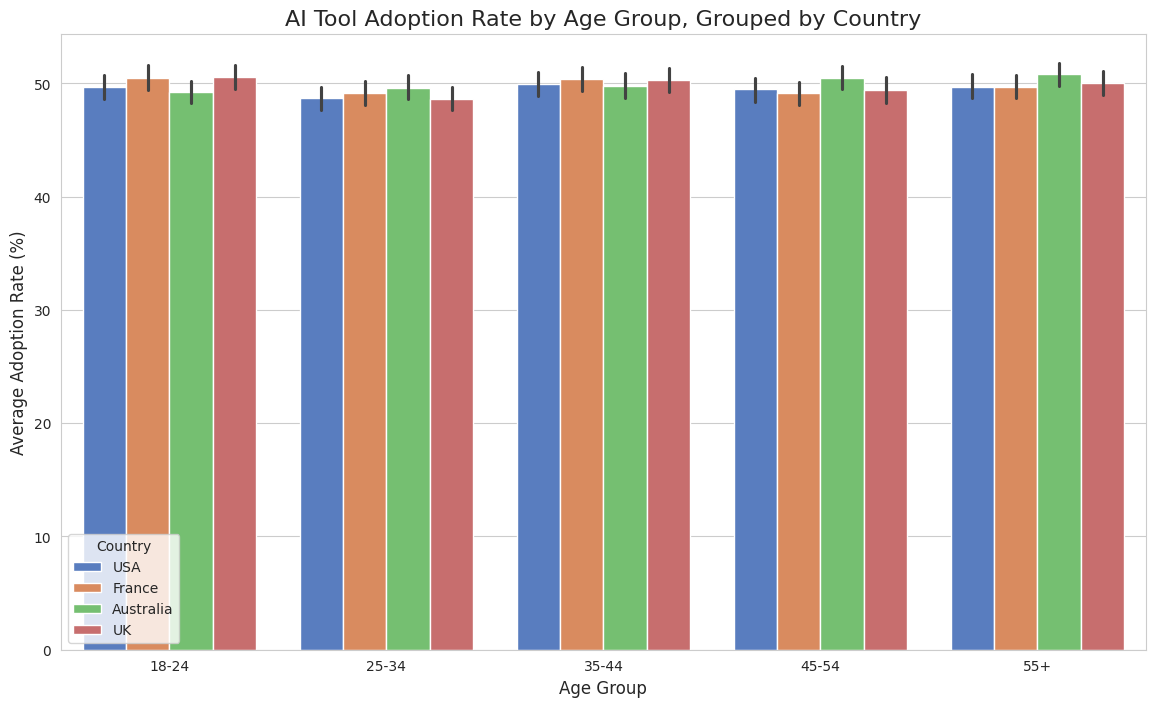

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# For clarity, filter for a subset of countries found in the data sample
countries_subset = ['USA', 'UK', 'France', 'Australia']
df_subset = df[df['country'].isin(countries_subset)]

# Set plot style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Define a logical order for the age groups
age_order = sorted(df_subset['age_group'].unique())

# Create the grouped bar chart
sns.barplot(data=df_subset, x='age_group', y='adoption_rate', hue='country', order=age_order, palette='muted')

# Set plot titles and labels
plt.title('AI Tool Adoption Rate by Age Group, Grouped by Country', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Adoption Rate (%)', fontsize=12)
plt.legend(title='Country')
plt.show()

## Visualization 5: AI Tool Adoption Rate by Age Group Grouped by Company Size
This grouped bar chart shows the average adoption rate by age, broken down by company size (Startup, SME, Enterprise). It shows how AI adoption behavior varies by user age within different organizational structures.

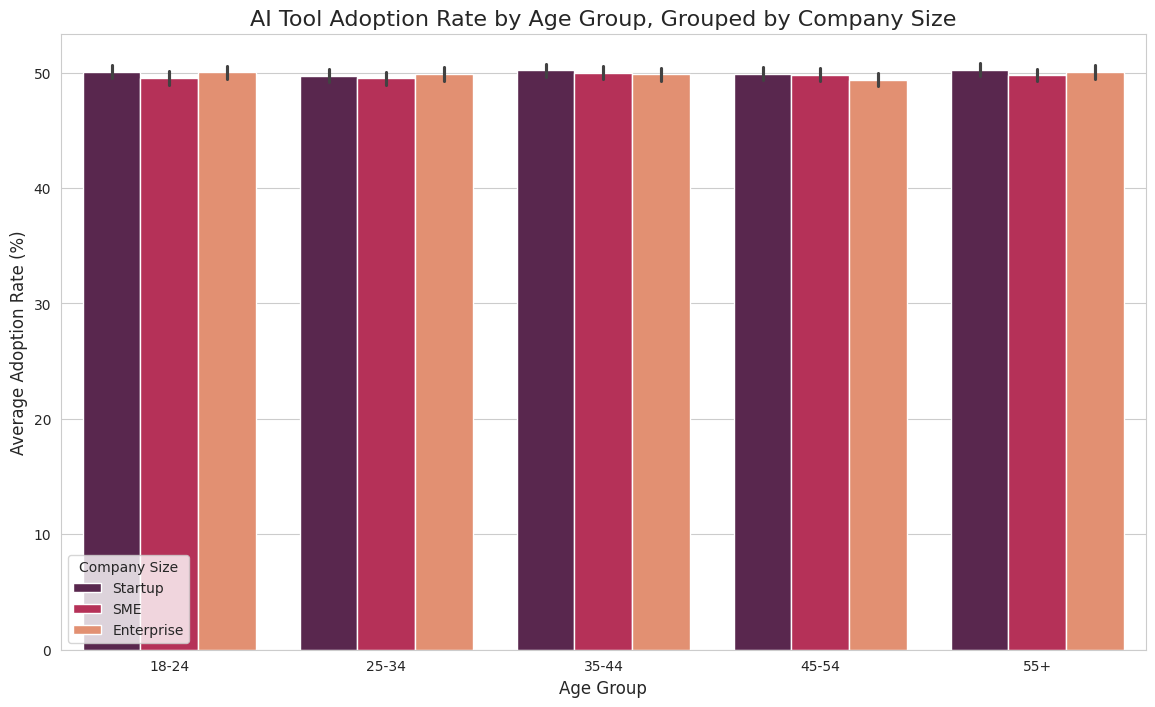

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Set plot style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Define a logical order for age groups and company sizes
age_order = sorted(df['age_group'].unique())
company_size_order = ['Startup', 'SME', 'Enterprise']

# Create the grouped bar chart
sns.barplot(data=df, x='age_group', y='adoption_rate', hue='company_size',
                 order=age_order, hue_order=company_size_order, palette='rocket')

# Set plot titles and labels
plt.title('AI Tool Adoption Rate by Age Group, Grouped by Company Size', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Adoption Rate (%)', fontsize=12)
plt.legend(title='Company Size')
plt.show()

## Visualization 6: Distribution of AI Tools by Company Size

This 100% stacked bar chart reveals the market share of different AI tools within each company size. Each bar adds up to 100%, and the segments represent the proportional preference for each AI tool, showing, for instance, if startups prefer different tools than enterprises.

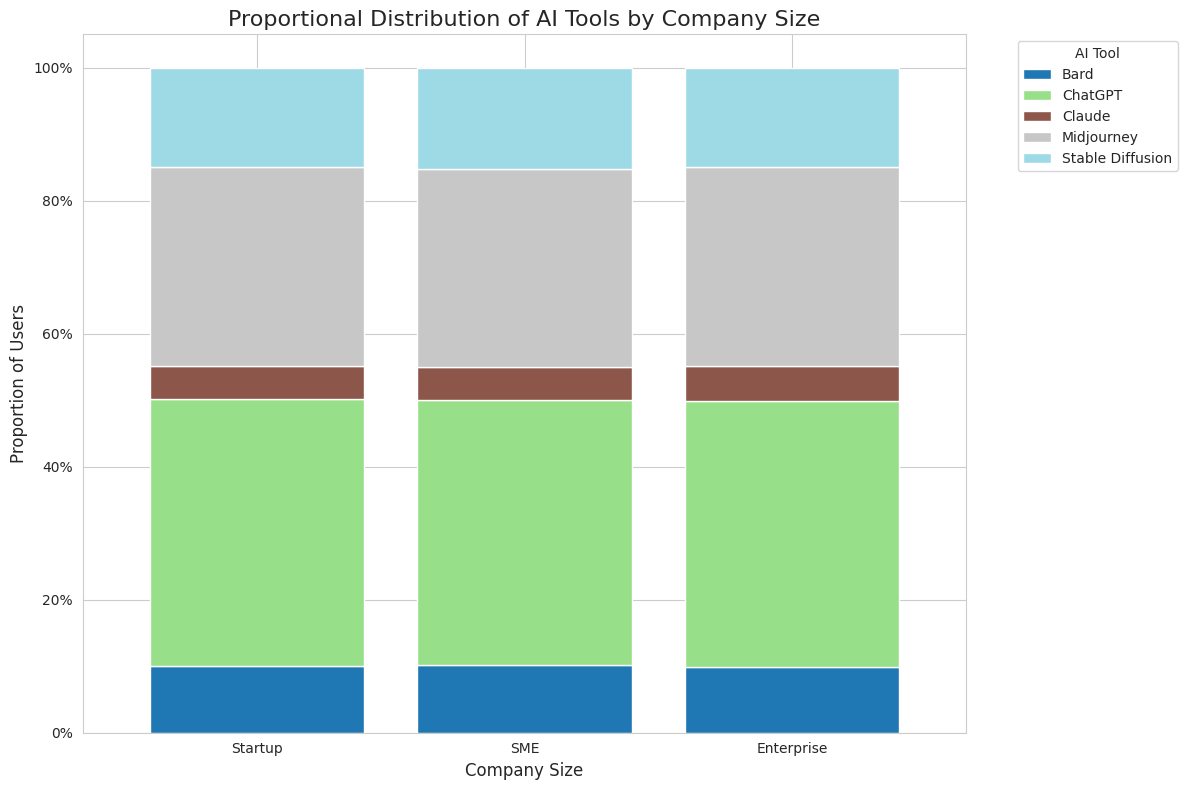

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Create a cross-tabulation of company size and AI tool counts
cross_tab = pd.crosstab(df['company_size'], df['ai_tool'])

# Normalize the cross-tabulation to get proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Reorder columns to match the bar chart from the project proposal
company_size_order = ['Startup', 'SME', 'Enterprise']
cross_tab_prop = cross_tab_prop.reindex(company_size_order)

# Create the 100% stacked bar chart
ax = cross_tab_prop.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', width=0.8)

# Set plot titles and labels
plt.title('Proportional Distribution of AI Tools by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Proportion of Users', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='AI Tool', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

## Visualization 7: Daily Active Users (DAU) by Industry and AI Tool

This treemap provides a hierarchical breakdown of daily active users. The largest rectangles represent the industries with the most DAU, and each is subdivided to show the DAU for specific AI tools within that industry. The size of each rectangle is proportional to its DAU count.




In [8]:
import pandas as pd
import plotly.express as px

# Load the dataset from the CSV file
df = pd.read_csv('ai_adoption_dataset.csv')

# Group data by industry and AI tool, summing the daily active users
treemap_data = df.groupby(['industry', 'ai_tool'])['daily_active_users'].sum().reset_index()

# Create the treemap
fig = px.treemap(treemap_data,
                 path=[px.Constant("All Industries"), 'industry', 'ai_tool'],
                 values='daily_active_users',
                 title='Daily Active Users (DAU) by Industry and AI Tool',
                 color='industry',
                 color_discrete_map={'(?)':'#222'})

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()